<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(_1_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,83.417799,66.884222,62.175093,98.442335,0.029838,320.949287,320.952072,-0.002784
1,0.0,1.0,84.270353,44.969319,91.509948,75.507423,-0.218182,306.038862,306.291181,-0.252319
2,0.0,2.0,55.234224,47.752090,97.190350,45.997370,-0.099630,256.074405,256.169894,-0.095489
3,0.0,3.0,96.047202,30.100738,85.006519,91.717896,0.218710,313.091064,312.943347,0.147717
4,0.0,4.0,80.320856,45.586581,20.001638,59.766048,0.015710,215.690832,215.729403,-0.038570
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,32.345991,46.289148,88.350636,32.253764,0.026856,209.266395,209.154133,0.112262
19996,999.0,16.0,40.169316,92.758719,59.492006,24.281996,-0.087322,226.614715,226.700265,-0.085550
19997,999.0,17.0,67.736262,81.822995,67.603866,81.657537,0.034246,308.854906,308.926518,-0.071613
19998,999.0,18.0,42.042447,28.811697,29.770277,66.415220,0.096031,177.135672,176.909121,0.226551


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    83.417799  66.884222  62.175093  98.442335  0.029838  320.949287   
      1.0    84.270353  44.969319  91.509948  75.507423 -0.218182  306.038862   
      2.0    55.234224  47.752090  97.190350  45.997370 -0.099630  256.074405   
      3.0    96.047202  30.100738  85.006519  91.717896  0.218710  313.091064   
      4.0    80.320856  45.586581  20.001638  59.766048  0.015710  215.690832   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   32.345991  46.289148  88.350636  32.253764  0.026856  209.266395   
      16.0   40.169316  92.758719  59.492006  24.281996 -0.087322  226.614715   
      17.0   67.736262  81.822995  67.603866  81.657537  0.034246  308.854906   
      18.0   42.042447  28.811697  29.770277  66.415220  0.096031  177.135672   
      19.0   42.896486  47.713569  62.351980  49.691537 -0.019701  212.633872   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    320.952072 -0.002784  
      1.0    306.291181 -0.252319  
      2.0    256.169894 -0.095489  
      3.0    312.943347  0.147717  
      4.0    215.729403 -0.038570  
...                 ...       ...  
999.0 15.0   209.154133  0.112262  
      16.0   226.700265 -0.085550  
      17.0   308.926518 -0.071613  
      18.0   176.909121  0.226551  
      19.0   212.578809  0.055063  

[20000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    83.417799  66.884222  62.175093  98.442335  0.029838  320.949287   
      1.0    84.270353  44.969319  91.509948  75.507423 -0.218182  306.038862   
      2.0    55.234224  47.752090  97.190350  45.997370 -0.099630  256.074405   
      3.0    96.047202  30.100738  85.006519  91.717896  0.218710  313.091064   
      4.0    80.320856  45.586581  20.001638  59.766048  0.015710  215.690832   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   32.345991  46.289148  88.350636  32.253764  0.026856  209.266395   
      16.0   40.169316  92.758719  59.492006  24.281996 -0.087322  226.614715   
      17.0   67.736262  81.822995  67.603866  81.657537  0.034246  308.854906   
      18.0   42.042447  28.811697  29.770277  66.415220  0.096031  177.135672   
      19.0   42.896486  47.713569  62.351980  49.691537 -0.019701  212.633872   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    320.952072 -0.002784  
      1.0    306.291181 -0.252319  
      2.0    256.169894 -0.095489  
      3.0    312.943347  0.147717  
      4.0    215.729403 -0.038570  
...                 ...       ...  
999.0 15.0   209.154133  0.112262  
      16.0   226.700265 -0.085550  
      17.0   308.926518 -0.071613  
      18.0   176.909121  0.226551  
      19.0   212.578809  0.055063  

[20000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,83.417799,66.884222,62.175093,98.442335,0.029838,320.949287,320.952072,-0.002784
1,0.0,1.0,84.270353,44.969319,91.509948,75.507423,-0.218182,306.038862,306.291181,-0.252319
2,0.0,2.0,55.234224,47.752090,97.190350,45.997370,-0.099630,256.074405,256.169894,-0.095489
3,0.0,3.0,96.047202,30.100738,85.006519,91.717896,0.218710,313.091064,312.943347,0.147717
4,0.0,4.0,80.320856,45.586581,20.001638,59.766048,0.015710,215.690832,215.729403,-0.038570
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,32.345991,46.289148,88.350636,32.253764,0.026856,209.266395,209.154133,0.112262
19996,999.0,16.0,40.169316,92.758719,59.492006,24.281996,-0.087322,226.614715,226.700265,-0.085550
19997,999.0,17.0,67.736262,81.822995,67.603866,81.657537,0.034246,308.854906,308.926518,-0.071613
19998,999.0,18.0,42.042447,28.811697,29.770277,66.415220,0.096031,177.135672,176.909121,0.226551


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    83.417799  66.884222  62.175093  98.442335  0.029838  320.949287   
      1.0    84.270353  44.969319  91.509948  75.507423 -0.218182  306.038862   
      2.0    55.234224  47.752090  97.190350  45.997370 -0.099630  256.074405   
      3.0    96.047202  30.100738  85.006519  91.717896  0.218710  313.091064   
      4.0    80.320856  45.586581  20.001638  59.766048  0.015710  215.690832   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   32.345991  46.289148  88.350636  32.253764  0.026856  209.266395   
      16.0   40.169316  92.758719  59.492006  24.281996 -0.087322  226.614715   
      17.0   67.736262  81.822995  67.603866  81.657537  0.034246  308.854906   
      18.0   42.042447  28.811697  29.770277  66.415220  0.096031  177.135672   
      19.0   42.896486  47.713569  62.351980  49.691537 -0.019701  212.633872   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    320.952072 -0.002784  
      1.0    306.291181 -0.252319  
      2.0    256.169894 -0.095489  
      3.0    312.943347  0.147717  
      4.0    215.729403 -0.038570  
...                 ...       ...  
999.0 15.0   209.154133  0.112262  
      16.0   226.700265 -0.085550  
      17.0   308.926518 -0.071613  
      18.0   176.909121  0.226551  
      19.0   212.578809  0.055063  

[20000 rows x 8 columns]

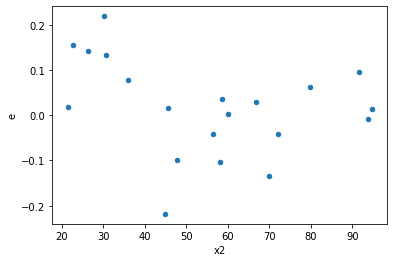

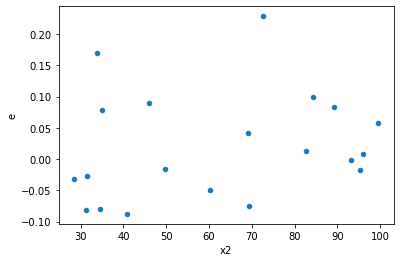

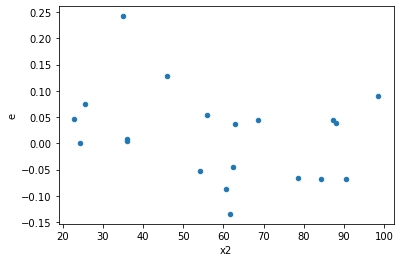

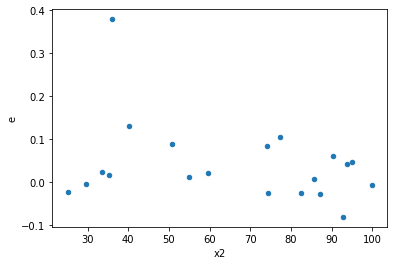

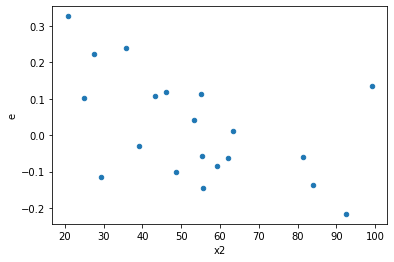

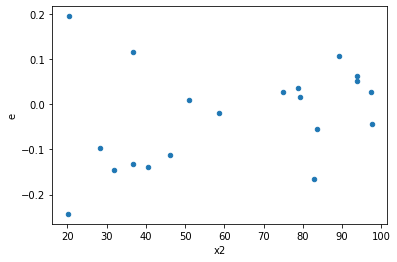

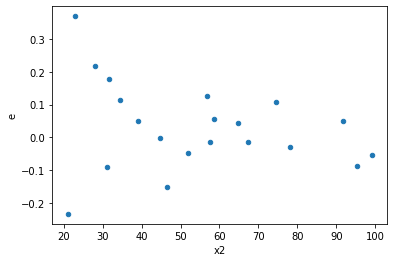

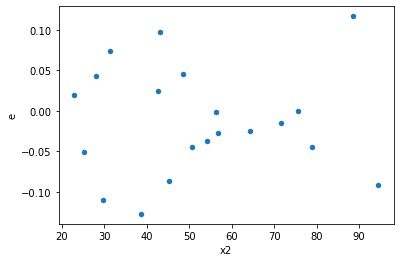

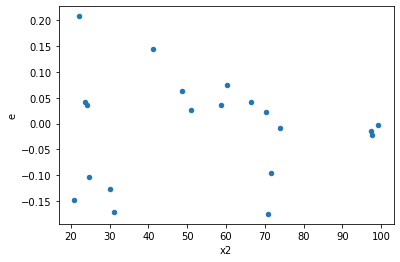

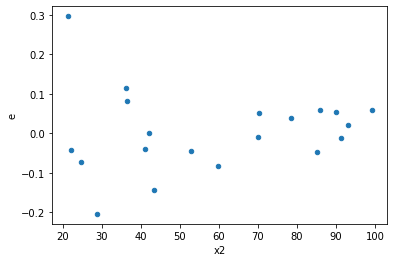

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,7.0,5.0,0.027569763540358363,0.03820691023877049,0.003938537648622623,0.007641382047754099,1.9401571673248892,0.4832451354837599,0.75837743225812,0.24162256774187996,Reject001=1 : Homoscedasticity
2.0,7.0,5.0,0.026725138399723534,0.02749823030659891,0.003817876914246219,0.005499646061319782,1.4404985244019064,0.710955918160683,0.6445220409196585,0.3554779590803415,Reject001=1 : Homoscedasticity
4.0,10.0,2.0,0.08506639548300372,0.03344907764507124,0.008506639548300372,0.01672453882253562,1.9660570696071382,0.7678569779335673,0.6160715110332163,0.38392848896678367,Reject001=1 : Homoscedasticity
5.0,7.0,5.0,0.032150688082351594,0.07959131330671147,0.004592955440335942,0.015918262661342296,3.4657994984114167,0.19004074215333255,0.9049796289233337,0.09502037107666628,Reject001=1 : Homoscedasticity
6.0,6.0,6.0,0.07534239302513597,0.1534980669038179,0.012557065504189328,0.025583011150636315,2.0373399455550527,0.40768631542374534,0.7961568422881273,0.20384315771187267,Reject001=1 : Homoscedasticity
8.0,5.0,7.0,0.0205509374417607,0.049274687461195836,0.0041101874883521395,0.007039241065885119,1.712632595431139,0.4993145434908022,0.7503427282545989,0.2496572717454011,Reject001=1 : Homoscedasticity
11.0,4.0,8.0,0.03341130326698494,0.10300301374705688,0.008352825816746234,0.01287537671838211,1.541439627840533,0.557628111450601,0.7211859442746995,0.2788140557253005,Reject001=1 : Homoscedasticity
12.0,4.0,8.0,0.025352455426707284,0.06347548002406324,0.006338113856676821,0.007934435003007905,1.251860598030983,0.7268315614741994,0.6365842192629003,0.3634157807370997,Reject001=1 : Homoscedasticity
13.0,5.0,7.0,0.030987190735531703,0.06289991023092235,0.0061974381471063406,0.008985701461560336,1.4499057914367195,0.6310059972265676,0.6844970013867162,0.3155029986132838,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,7.0,0.08722975295316951,0.04481121843775271,0.0174459505906339,0.006401602633964673,0.36693917025085815,0.2873196957816077,Reject001=1 : Homoscedasticity
1.0,7.0,5.0,0.027569763540358363,0.03820691023877049,0.003938537648622623,0.007641382047754099,1.9401571673248892,0.4832451354837599,Reject001=1 : Homoscedasticity
2.0,7.0,5.0,0.026725138399723534,0.02749823030659891,0.003817876914246219,0.005499646061319782,1.4404985244019064,0.710955918160683,Reject001=1 : Homoscedasticity
3.0,8.0,4.0,0.11628095541247355,0.0026716058239234963,0.014535119426559193,0.0006679014559808741,0.045950875006947375,0.00046804469402431673,Reject001=0 : Heteroscedasticity
4.0,10.0,2.0,0.08506639548300372,0.03344907764507124,0.008506639548300372,0.01672453882253562,1.9660570696071382,0.7678569779335673,Reject001=1 : Homoscedasticity
5.0,7.0,5.0,0.032150688082351594,0.07959131330671147,0.004592955440335942,0.015918262661342296,3.4657994984114167,0.19004074215333255,Reject001=1 : Homoscedasticity
6.0,6.0,6.0,0.07534239302513597,0.1534980669038179,0.012557065504189328,0.025583011150636315,2.0373399455550527,0.40768631542374534,Reject001=1 : Homoscedasticity
7.0,10.0,2.0,0.05894281189280115,6.68725145898692e-05,0.005894281189280115,3.34362572949346e-05,0.005672660706405536,3.1921346700204e-08,Reject001=0 : Heteroscedasticity
8.0,5.0,7.0,0.0205509374417607,0.049274687461195836,0.0041101874883521395,0.007039241065885119,1.712632595431139,0.4993145434908022,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      861
Reject001=0 : Heteroscedasticity    139
Name: Result_test, dtype: int64